# Spacetime and muon lifetime

Here we will explore some of the subtleties of 4-dimensional spacetime and learn how the number of muons recorded at Earth's surface during air showers is evidence in favor of special relativity.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import constants
from matplotlib.patches import Ellipse, Arc
from IPython.display import display, Image

# Make readable plots
plt.rcParams.update({"font.size":16, "axes.labelsize":16, "font.family":"sans-serif", 
                     "font.sans-serif":"Arial"})

### Causality

Suppose Event 1 and Event 2 occur at spacetime coordinates $s_1 = (x_1, y_1, z_1, ct_1)$ and $s_2 = (x_2, y_2, z_2, ct_2)$, respectively. Is Event 1 partially or completely responsible for causing Event 2? At minimum, enough time has to lapse for light to travel from $s_1$ to $s_2$. Otherwise, nothing and no one at $s_2$ even knows about Event 1. We can explore causality using light cones:

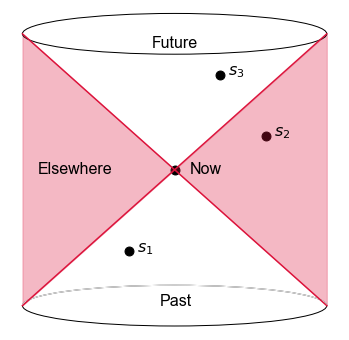

In [2]:
x = np.linspace(-10, 10, num=101, endpoint=True)

plt.figure(figsize=(6,6))
plt.plot(x, x, color='crimson')
plt.plot(x, -x, color='crimson')
plt.scatter([0], [0], color='k', s=80)
plt.scatter([6], [2.5], color='k', s=80)
plt.scatter([-3], [-6], color='k', s=80)
plt.scatter([3], [7], color='k', s=80)
plt.ylim([-12, 12])
plt.fill_between(x, np.concatenate((x[0:51], -x[51:101])), 
                    np.concatenate((-x[0:51], x[51:101])), color='crimson', alpha=0.3)
plt.text(1, -0.3, 'Now')
plt.text(-1.5, 9, 'Future')
plt.text(-1, -10, 'Past')
plt.text(-9, -0.3, 'Elsewhere')
plt.text(-2.5, -6, r"$s_1$")
plt.text(6.5, 2.5, r"$s_2$")
plt.text(3.5, 7, r"$s_3$")
ax = plt.gca()
ax.axis('off')
ellipse1 = Ellipse(xy=(0, 10), width=20, height=3, edgecolor='k', fc='None')
ellipse2 = Ellipse(xy=(0, -10), width=20, height=3, edgecolor='k', fc='None')
arc = Arc((0, -10), 20, 3, angle=0.0, theta1=0.0, theta2=180.0, color='white')
ax.add_patch(ellipse1)
ax.add_patch(ellipse2)
ax.add_patch(arc)

In the light cone above, the point labeled "Now" has $(x, ct) = (0, 0)$. This is the convention, but it's not a requirement. You can choose any point in space and time as your origin. Parts of spacetime that could have affected what's happening Now are in the section of the light cone labeled "Past". Parts of spacetime that could be affected by what's happening Now are in the "Future". Thus $s_1$ could have helped cause what's happening Now, and Now could have some bearing on what happens at $s_3$.

The red-shaded zone labeled "Elsewhere" is not causally connected to the present. For example, information from Now would have to travel faster than light to reach $s_2$, which is not possible. If $s_2$ doesn't know about anything happening Now, there can be no causal relationship between the two points.

### Spacetime intervals

Suppose we are given two arbitrary sets of spacetime coordinates, $s_1$ and $s_2$. Mathematically, we tell if there could be causality or simultaneity. Calculate the <em>spacetime interval</em><br />
$\Delta s^2 = \Delta x^2 + \Delta y^2 + \Delta z^2 - c^2 \Delta t^2$.<br />
(Watch out for the minus sign!) In this class we have mostly considered relative motion in the x-direction. If $\Delta y = \Delta t = 0$, then the spacetime interval reduces to <br />
$\Delta s^2 = \Delta x^2 - c^2 \Delta t^2$.

There are three types of spacetime intervals:
<ul>
    <li><em>Lightlike</em>: $\Delta s^2 = 0$, so $\Delta x^2 = c^2 \Delta t^2$. In this case, $s_1$ and $s_2$ can only be connected by a light signal.</li>
    <li><em>Spacelike</em>: $\Delta s^2 > 0$, so $\Delta x^2 > c^2 \Delta t^2$. No signal can travel fast enough to connect the two events, so there can be no causality. But there can be simultaneity: it is always possible to find an inertial frame in which the two events occur at the same time at different locations $x_1$ and $x_2$.</li>
    <li><em>Timelike</em>: $\Delta s^2 < 0$, so $\Delta x^2 < c^2 \Delta t^2$. Light has more than enough time to travel from $s_1$ to $s_2$, so the events can be causally connected. Simultaneity is not possible, but we can find an inertial frame in which the two events happened in the same physical location $x$ (at different times).</li>
</ul>

### Muon lifetime

Several research groups in the physics department study cosmic rays, which are high-energy particles from space. When they enter Earth's atmosphere, they typically break up into a cascade of smaller-mass particles or "air shower":

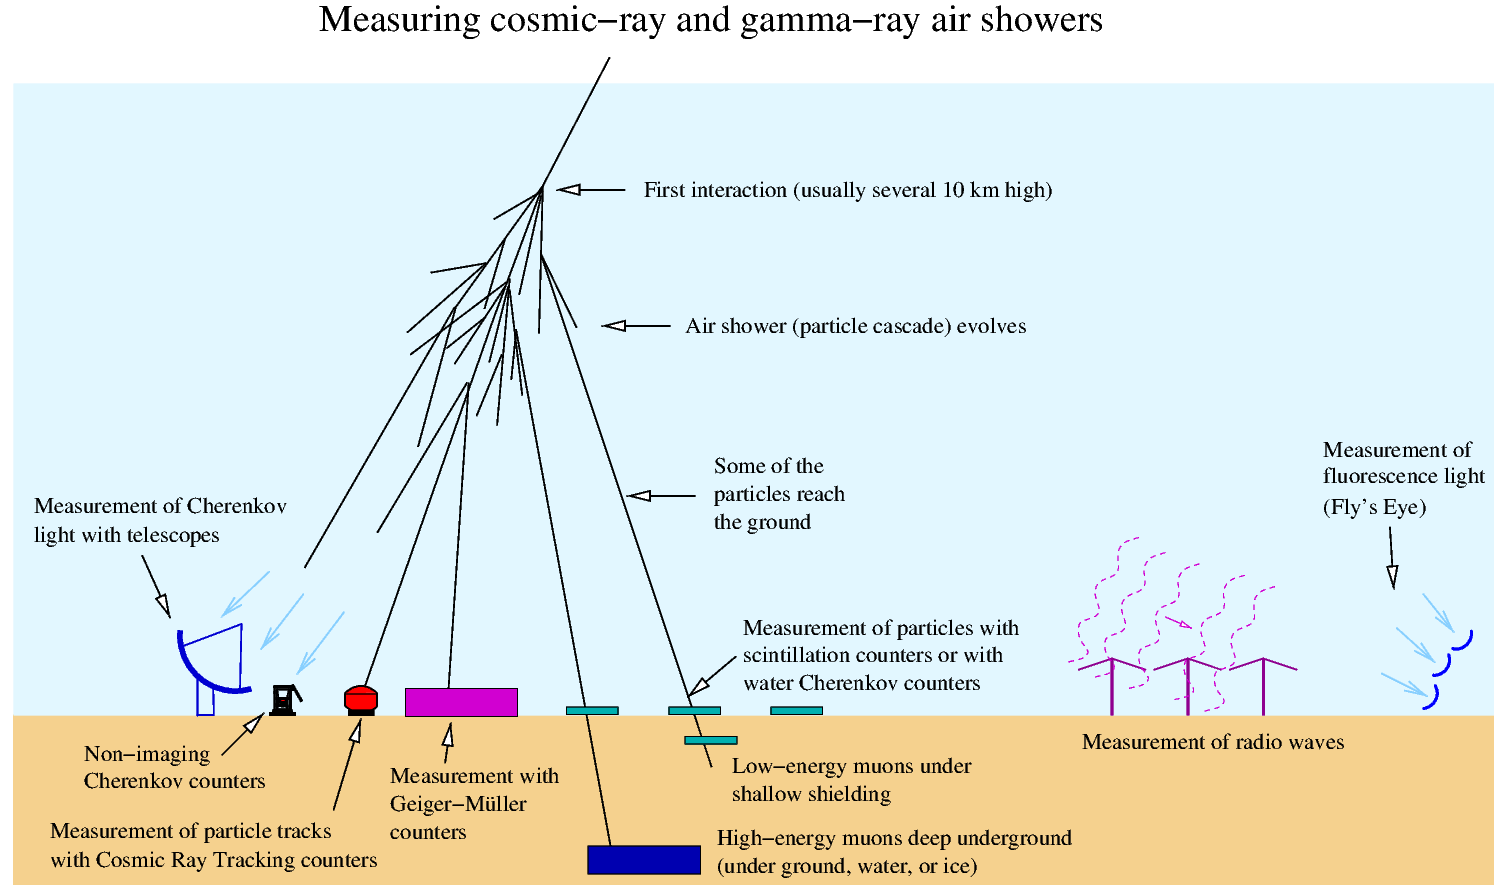

In [3]:
display(Image(filename='air_shower.png'))

Some of the particles produced in the air shower will be unstable muons, which have a half-life of $t_{1/2} = 1.52 \times 10^{-6}$ s. We can write an equation to predict how many muons will be present at time $t$:

$N = N_0 \left( \frac{1}{2} \right)^{t / t_{1/2}}$,

where $N_0$ is the number of muons present at $t = 0$.

Suppose we have a muon detector on top of a 2000-meter-high mountain that counts $10^3$ muons per second. There is also a muon detector at sea level. The muons are traveling at $0.98c$ after they are produced in the air shower. Using classical physics, we can find the number of muons per second that the ground-level detector <em>should</em> count:

Time for muon to travel from top of mountain to ground: 2000 m / $0.98c$

Fraction of muons that survive the trip according to classical physics: $\frac{N}{N_0} = \left( \frac{1}{2} \right)^{(2000 \mathrm{m} / 0.98c) / t_{1/2}}$

In [5]:
thalf = 1.52e-6 # s
fmu = 0.5**(2000 / constants.c / thalf) # SI units are default for scipy.constants
print('Fraction of muons at 2000-meter altitude that should survive trip to the ground:',
      f"{fmu:.5f}")
print('Number of muons per second that should reach the ground:', f"{fmu * 1000:.5f}")

Fraction of muons at 2000-meter altitude that should survive trip to the ground: 0.04773
Number of muons per second that should reach the ground: 47.72863


### But the muon counter at the ground records 545 muons/second. Why??

Consider the fact that the muon speed $c$ and the mountain height are both measured from the perspective of an observer at rest with respect to the ground. The muon travel time $2000 \; \mathrm{m} \; / \; 0.98 c$ was therefore measured in a reference frame in which the muons are moving; there is no clock or altimeter that's flying along and keeping pace with the muons. But what if there were? Recall $T = \gamma T_0$, where $T_0$, the proper time interval, is measured in the rest frame. In this case, $T = 2000 \; \mathrm{m} \; / \; 0.98 c$, and the muons' lifetime measured in their own rest frame is actually $T_0 = T / \gamma$.

In [7]:
v = 0.98 * constants.c
gamma = 1 / np.sqrt(1 - v**2 / constants.c**2)
T0 = (2000 / constants.c) / gamma
print("Proper time interval measured in muon rest frame =", f"{T0:.5g}", 
      "seconds")

Proper time: muon lifetime measured in muon rest frame = 1.3276e-06 seconds


Now we figure out what fraction of the muons survive without decaying during the proper time interval:

In [11]:
fmu_proper = 0.5**(T0 / thalf)
print("Fraction of muons that survive the trip to the ground according to relativity:",
      f"{fmu_proper:.5f}")
print("Number of muons per second arriving at the ground:", f"{fmu_proper * 1000:.3f}")

Fraction of muons that survive the trip to the ground according to relativity: 0.54586
Number of muons per second arriving at the ground: 545.859


Equally, we could say that the proper length interval is always the <em>longest</em>: lengths of moving objects are shorter. Sit in the muon rest frame and watch the surface of the Earth move toward you. The mountain becomes a moving object whose height gets Lorentz-contracted to $L_0 / \gamma$, where $L_0 = 2000$ m. The time it takes for the entire mountain, from top to bottom, to pass by the muons is $L_0 / \gamma / v$, where $v = 0.98c$. We can plug that in for $t$ in our half-life equation:

In [12]:
fmu_proper_2 = 0.5**((2000 / gamma / v) / thalf)
print("Fraction of muons that survive the trip, solving the problem using proper length:",
      f"{fmu_proper_2:.5f}")
print("Number of muons per second that hit the ground, solving the problem using proper length:",
      f"{fmu_proper_2 * 1000:.3f}")

Fraction of muons that survive the trip, solving the problem using proper length: 0.53916
Number of muons per second that hit the ground, solving the problem using proper length: 539.156
